In [1]:
import numpy as np
import os
import torch
import tqdm
import cv2
import matplotlib.pyplot as plt

from modules.xfeat import XFeat

xfeat = XFeat()

loading weights from: /Users/farrelsalim/Documents/vebits-intern/xfeat-matching/modules/../weights/xfeat.pt


In [2]:
import cv2
import numpy as np

def warp_corners_and_draw_matches(ref_points, dst_points, img1, img2):
    # Calculate the Homography matrix
    H, mask = cv2.findHomography(ref_points, dst_points, cv2.USAC_MAGSAC, 3.5, maxIters=1_000, confidence=0.999)
    mask = mask.flatten()

    # Get corners of the first image (image1)
    h, w = img1.shape[:2]
    corners_img1 = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype=np.float32).reshape(-1, 1, 2)

    # Warp corners to the second image (image2) space
    warped_corners = cv2.perspectiveTransform(corners_img1, H)

    # Draw the warped corners in image2
    img2_with_corners = img2.copy()
    '''
    for i in range(len(warped_corners)):
        start_point = tuple(warped_corners[i-1][0].astype(int))
        end_point = tuple(warped_corners[i][0].astype(int))
        cv2.line(img2_with_corners, start_point, end_point, (0, 255, 0), 4)  # Using solid green for corners
    '''

    # Prepare keypoints and matches for drawMatches function
    keypoints1 = [cv2.KeyPoint(p[0], p[1], 5) for p in ref_points]
    keypoints2 = [cv2.KeyPoint(p[0], p[1], 5) for p in dst_points]
    matches = [cv2.DMatch(i,i,0) for i in range(len(mask)) if mask[i]]

    # Draw inlier matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2_with_corners, keypoints2, matches, None,
                                  matchColor=(0, 255, 0), flags=2)

    return img_matches

In [3]:
import os 

files = os.listdir('images')
print(sorted(files))

['.DS_Store', '2024_03_14-11_07_31.327000.jpg', '2024_05_09-11_47_56.011000.jpg', '2024_05_09-11_47_56.141000.jpg', '2024_05_20-09_35_19.153000.jpg', '2024_05_20-09_35_19.736000.jpg', 'sign-sample.jpg']


In [4]:
img1_name = '2024_03_14-11_07_31.327000.jpg'
img2_name = '2024_05_09-11_47_56.011000.jpg'
img3_name = '2024_05_09-11_47_56.141000.jpg'
img4_name = '2024_05_20-09_35_19.153000.jpg'
img5_name = '2024_05_20-09_35_19.736000.jpg'
path_to_data = 'images/'

(129, 253, 3)


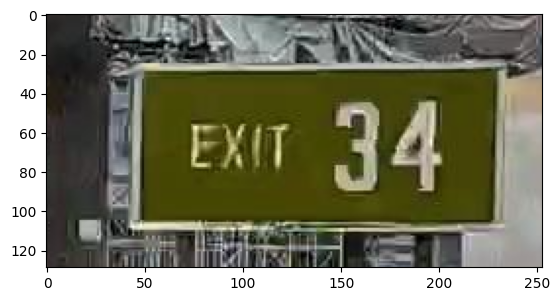

In [5]:
sign = cv2.imread('images/sign-sample.jpg')
print(sign.shape)
plt.imshow(sign)

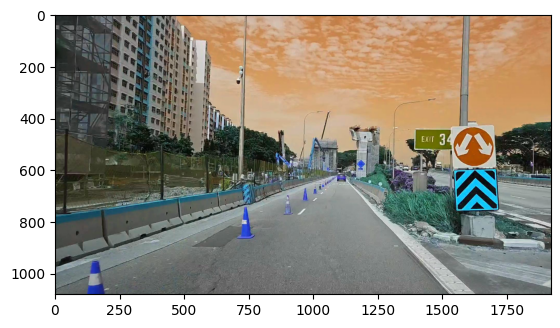

In [6]:
im1 = cv2.imread(path_to_data + img1_name)

plt.imshow(im1)

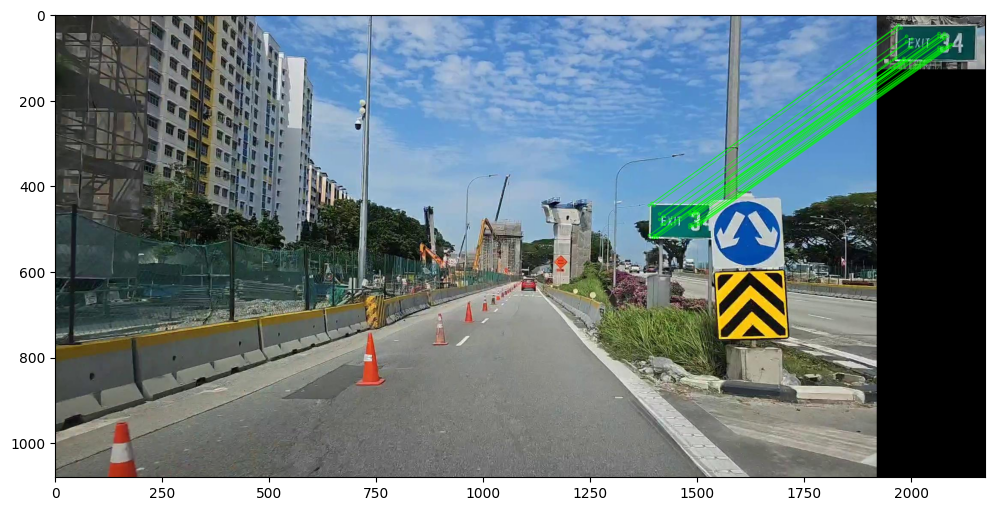

(<matplotlib.image.AxesImage at 0x15899adf0>, None)

In [7]:
mkpts_0, mkpts_1 = xfeat.match_xfeat_star(im1, sign, top_k = 8000)

canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im1, sign)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

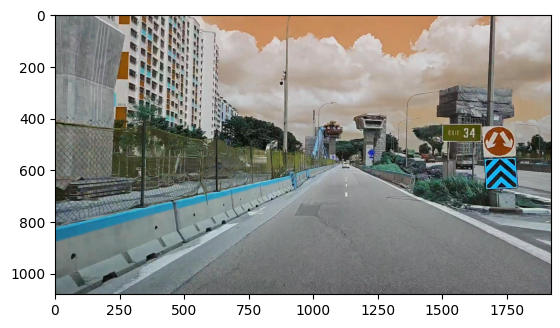

In [8]:
im2 = cv2.imread(path_to_data + img2_name)

plt.imshow(im2)

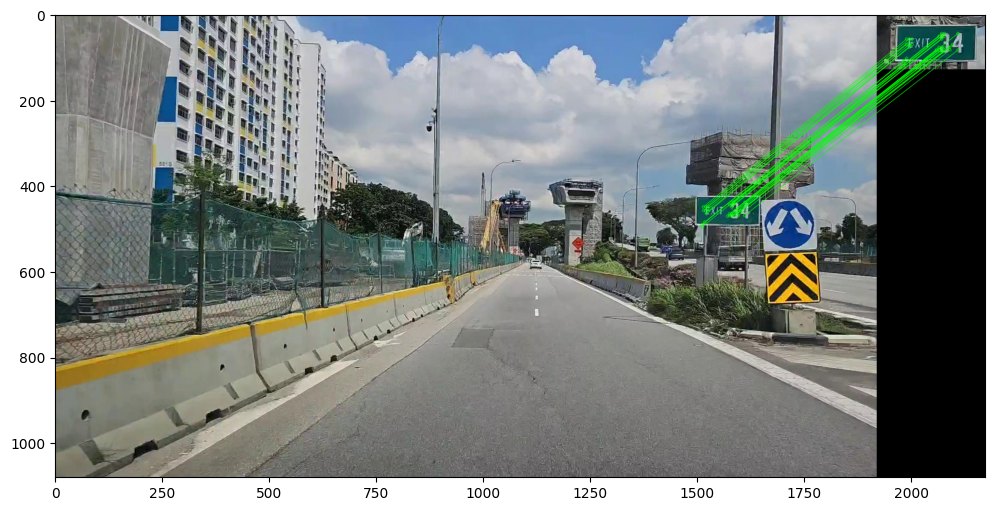

(<matplotlib.image.AxesImage at 0x1589bba30>, None)

In [9]:
mkpts_0, mkpts_1 = xfeat.match_xfeat_star(im2, sign, top_k = 8000)

canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im2, sign)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

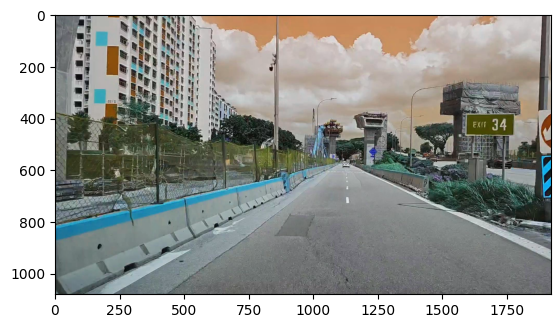

In [10]:
im3 = cv2.imread(path_to_data + img3_name)

plt.imshow(im3)

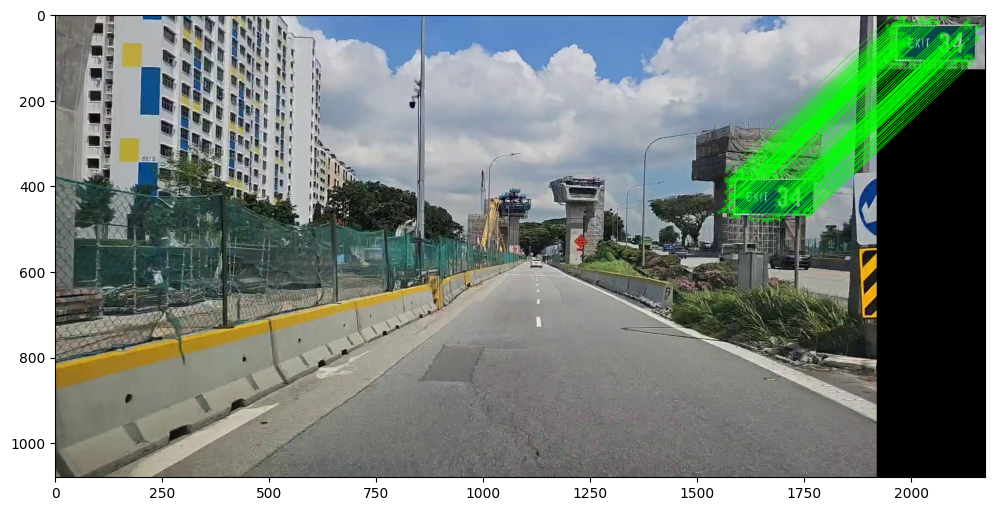

(<matplotlib.image.AxesImage at 0x168ee8a90>, None)

In [11]:
mkpts_0, mkpts_1 = xfeat.match_xfeat_star(im3, sign, top_k = 8000)

canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im3, sign)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

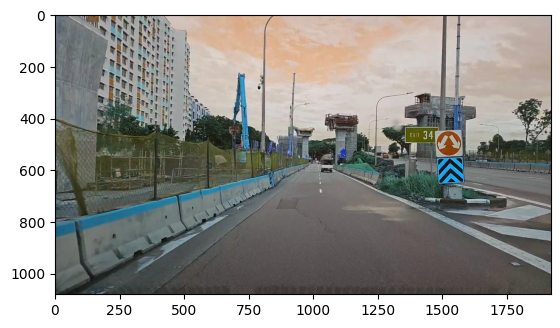

In [12]:
im4 = cv2.imread(path_to_data + img4_name)

plt.imshow(im4)

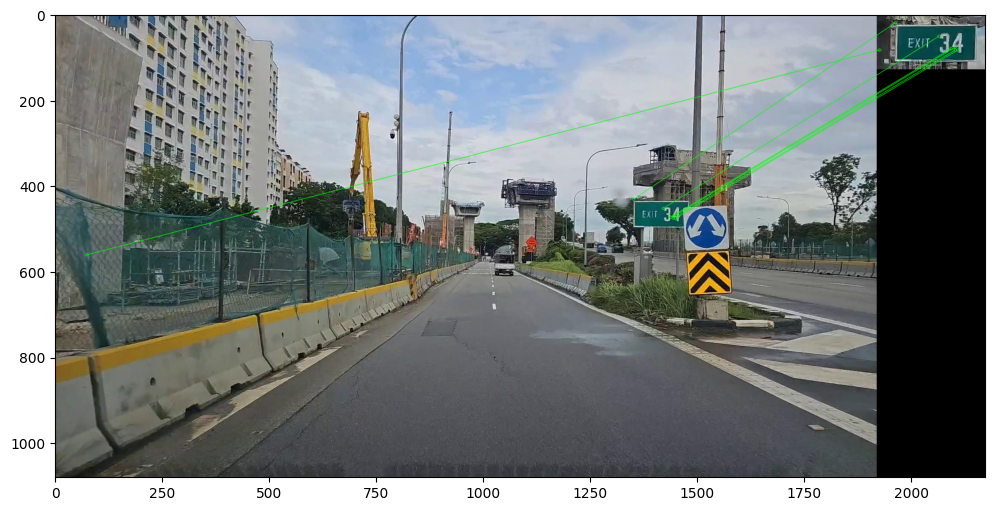

(<matplotlib.image.AxesImage at 0x16aa4c370>, None)

In [13]:
mkpts_0, mkpts_1 = xfeat.match_xfeat_star(im4, sign, top_k = 8000)

canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im4, sign)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

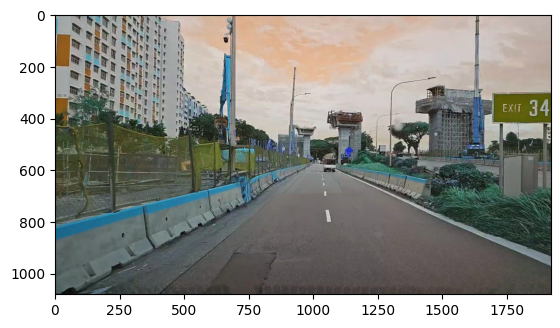

In [14]:
im5 = cv2.imread(path_to_data + img5_name)

plt.imshow(im5)

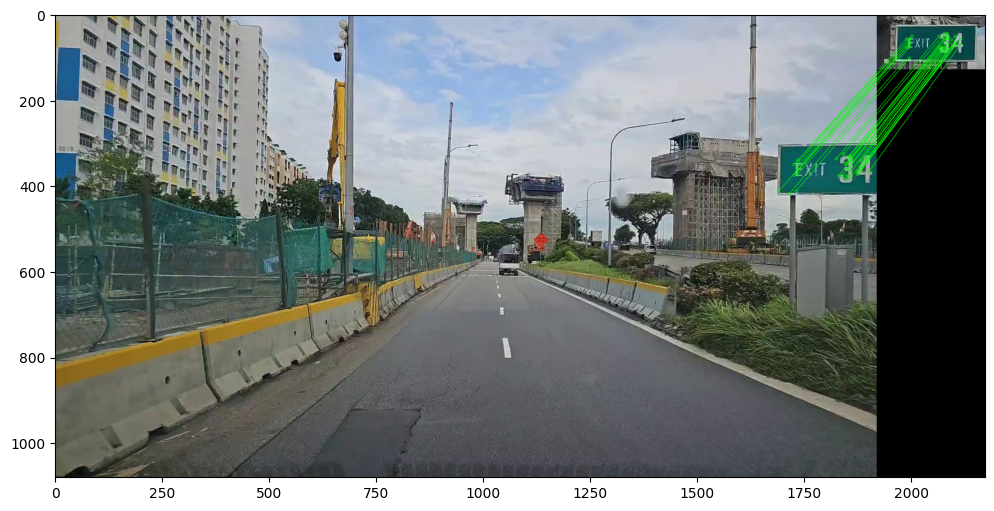

(<matplotlib.image.AxesImage at 0x16ab3a7f0>, None)

In [15]:
mkpts_0, mkpts_1 = xfeat.match_xfeat_star(im5, sign, top_k = 8000)

canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im5, sign)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

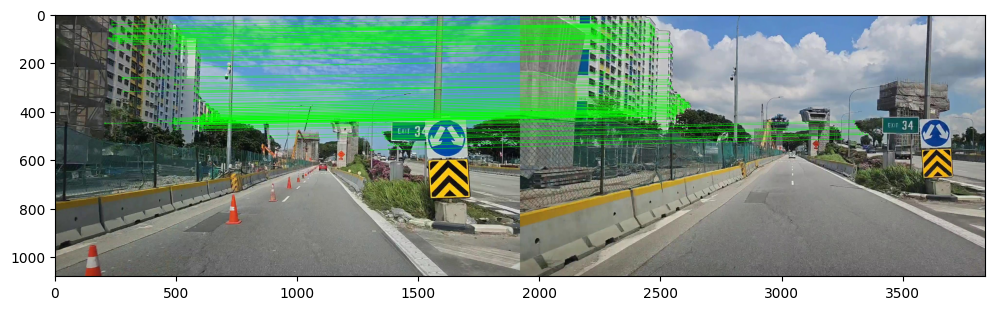

(<matplotlib.image.AxesImage at 0x16ab4c250>, None)

In [16]:
mkpts_0, mkpts_1 = xfeat.match_xfeat_star(im1, im2, top_k = 8000)

canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im1, im2)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

In [17]:
def dist(px1, px2):
    return np.sqrt((px1[0] - px2[0])**2 + (px1[1] - px2[1])**2)

def get_keypoint_matches_with_template(img1, img2, template_img, top_k):
    mkpts_img1_template_0, mkpts_img1_template_1 = xfeat.match_xfeat_star(img1, template_img, top_k)
    mkpts_img2_template_0, mkpts_img2_template_1 = xfeat.match_xfeat_star(img2, template_img, top_k)

    mkpts_img1_indexes = []
    mkpts_img2_indexes = []
    for i in range(len(mkpts_img1_template_1)):
        for j in range(len(mkpts_img2_template_1)):
            if dist(mkpts_img1_template_1[i], mkpts_img2_template_1[j]) <= 1e-4:
                mkpts_img1_indexes.append(i)
                mkpts_img2_indexes.append(j)

    mkpts_img1 = mkpts_img1_template_0[mkpts_img1_indexes]
    mkpts_img2 = mkpts_img2_template_0[mkpts_img2_indexes]

    return mkpts_img1, mkpts_img2

35


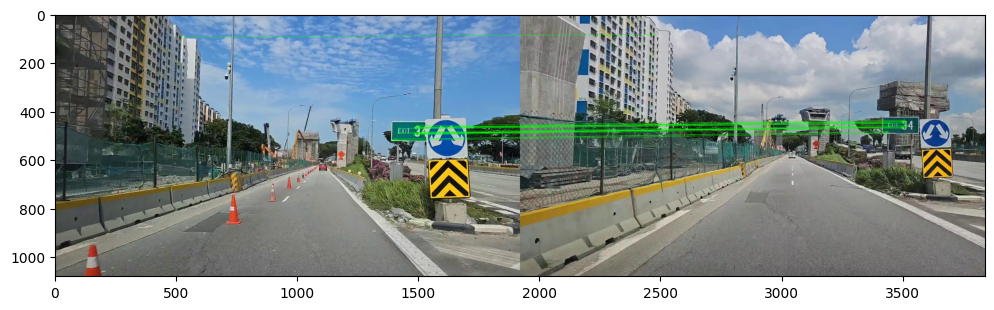

(<matplotlib.image.AxesImage at 0x168ffce50>, None)

In [18]:
mkpts_0, mkpts_1 = get_keypoint_matches_with_template(im1, im2, sign, top_k = 20000)
print(len(mkpts_0))
canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im1, im2)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

54


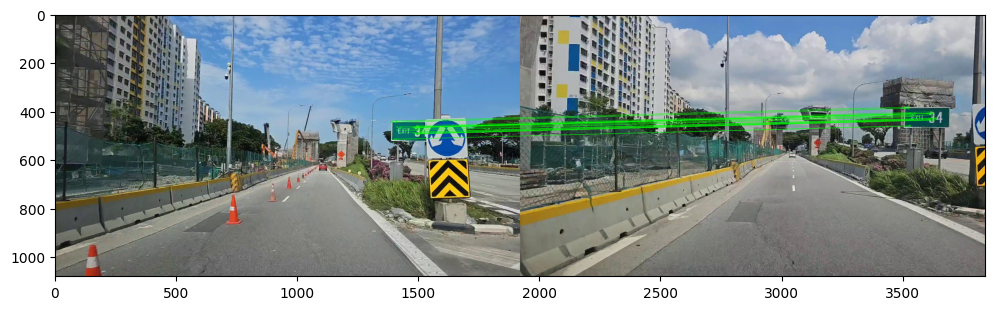

(<matplotlib.image.AxesImage at 0x169dacac0>, None)

In [19]:
mkpts_0, mkpts_1 = get_keypoint_matches_with_template(im1, im3, sign, top_k = 20000)
print(len(mkpts_0))
canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im1, im3)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

23


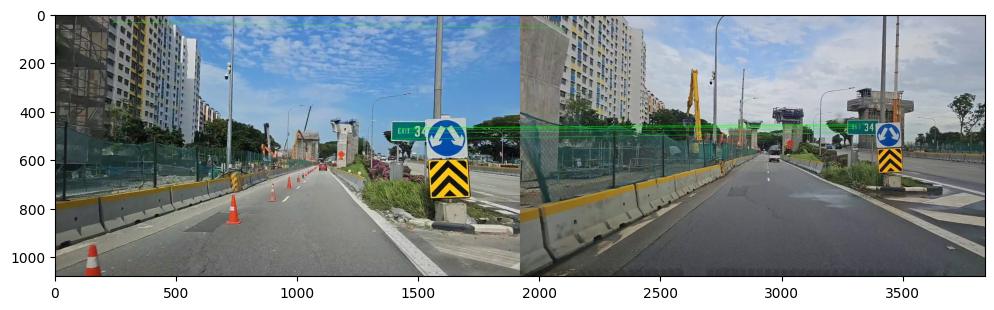

(<matplotlib.image.AxesImage at 0x168fc99d0>, None)

In [20]:
mkpts_0, mkpts_1 = get_keypoint_matches_with_template(im1, im4, sign, top_k = 20000)
print(len(mkpts_0))
canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im1, im4)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

25


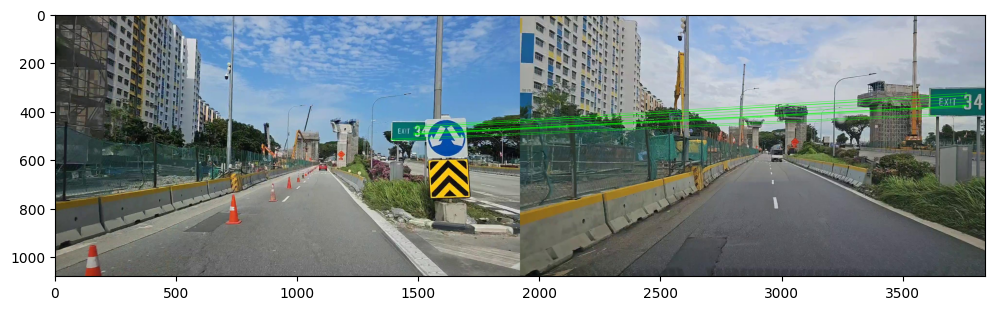

(<matplotlib.image.AxesImage at 0x169e15640>, None)

In [21]:
mkpts_0, mkpts_1 = get_keypoint_matches_with_template(im1, im5, sign, top_k = 20000)
print(len(mkpts_0))
canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im1, im5)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()